In [1]:
from sklearn import datasets

In [3]:
data = datasets.load_breast_cancer()

In [4]:
X = data.data

In [5]:
y = data.target

In [6]:
X.shape

(569, 30)

In [7]:
y.shape

(569,)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=456, stratify=y)

In [12]:
X_train.shape

(398, 30)

In [13]:
X_test.shape

(171, 30)

In [14]:
X_train[0]

array([1.613e+01, 1.788e+01, 1.070e+02, 8.072e+02, 1.040e-01, 1.559e-01,
       1.354e-01, 7.752e-02, 1.998e-01, 6.515e-02, 3.340e-01, 6.857e-01,
       2.183e+00, 3.503e+01, 4.185e-03, 2.868e-02, 2.664e-02, 9.067e-03,
       1.703e-02, 3.817e-03, 2.021e+01, 2.726e+01, 1.327e+02, 1.261e+03,
       1.446e-01, 5.804e-01, 5.274e-01, 1.864e-01, 4.270e-01, 1.233e-01])

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [19]:
model = Sequential()
model.add(Dense(input_dim=X_train.shape[1], units=100, activation='relu'))
model.add(Dense(units=40, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               3100      
_________________________________________________________________
dense_1 (Dense)              (None, 40)                4040      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 41        
Total params: 7,181
Trainable params: 7,181
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
history = model.fit(X_train, y_train, batch_size=64, epochs=20, validation_split=0.2)

Epoch 1/20
5/5 [==============================] - 0s 62ms/step - loss: 0.6117 - accuracy: 0.6384 - val_loss: 0.5689 - val_accuracy: 0.8125
Epoch 2/20
5/5 [==============================] - 0s 9ms/step - loss: 0.4627 - accuracy: 0.9025 - val_loss: 0.4520 - val_accuracy: 0.9000
Epoch 3/20
5/5 [==============================] - 0s 10ms/step - loss: 0.3605 - accuracy: 0.9371 - val_loss: 0.3550 - val_accuracy: 0.9750
Epoch 4/20
5/5 [==============================] - 0s 11ms/step - loss: 0.2793 - accuracy: 0.9465 - val_loss: 0.2776 - val_accuracy: 0.9750
Epoch 5/20
5/5 [==============================] - 0s 8ms/step - loss: 0.2211 - accuracy: 0.9560 - val_loss: 0.2170 - val_accuracy: 0.9750
Epoch 6/20
5/5 [==============================] - 0s 10ms/step - loss: 0.1803 - accuracy: 0.9591 - val_loss: 0.1719 - val_accuracy: 0.9875
Epoch 7/20
5/5 [==============================] - 0s 13ms/step - loss: 0.1504 - accuracy: 0.9654 - val_loss: 0.1400 - val_accuracy: 1.0000
Epoch 8/20
5/5 [=============

In [23]:
from matplotlib import pyplot as plt

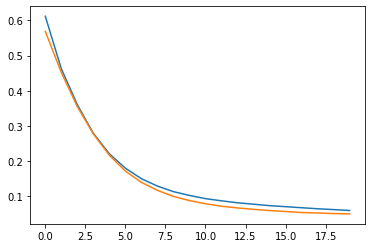

In [25]:
epochs = history.epoch
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])

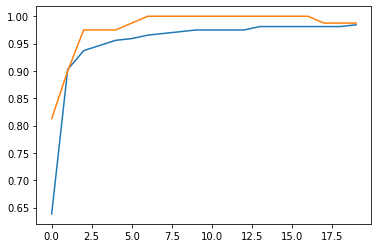

In [27]:
plt.plot(epochs, history.history['accuracy'])
plt.plot(epochs, history.history['val_accuracy'])

In [28]:
model.evaluate(X_test, y_test, batch_size=64)

3/3 [==============================] - 0s 4ms/step - loss: 0.0768 - accuracy: 0.9649


[0.07676075398921967, 0.9649122953414917]

In [29]:
import numpy as np

In [45]:
x_new = np.random.rand(X_train.shape[1])
x_new = x_new.reshape(1,-1)
# x_new.shape
y_pred = model.predict(x_new)
if y_pred < 0.5:
    print('0')
else:
    print('1')

0


In [61]:
from tensorflow.keras.datasets import boston_housing

In [62]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [63]:
X_train.shape

(404, 13)

In [64]:
X_test.shape

(102, 13)

In [65]:
X_train[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [73]:
model = Sequential()
model.add(Dense(input_dim=X_train.shape[1], units=50, activation='relu'))
# model.add(Dense(input_dim=X_train.shape[1], units=50, activation='relu'))
model.add(Dense(units=1))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 100)               1400      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 101       
Total params: 1,501
Trainable params: 1,501
Non-trainable params: 0
_________________________________________________________________


In [74]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [75]:
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.2)

Epoch 1/100
11/11 [==============================] - 0s 21ms/step - loss: 565.4792 - mae: 21.8616 - val_loss: 626.3698 - val_mae: 23.2181
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: 542.5411 - mae: 21.3783 - val_loss: 602.7205 - val_mae: 22.7345
Epoch 3/100
11/11 [==============================] - 0s 6ms/step - loss: 519.7443 - mae: 20.8883 - val_loss: 579.4443 - val_mae: 22.2357
Epoch 4/100
11/11 [==============================] - 0s 4ms/step - loss: 496.9561 - mae: 20.3636 - val_loss: 554.4185 - val_mae: 21.6909
Epoch 5/100
11/11 [==============================] - 0s 5ms/step - loss: 472.7896 - mae: 19.7972 - val_loss: 528.6769 - val_mae: 21.1025
Epoch 6/100
11/11 [==============================] - 0s 6ms/step - loss: 446.4904 - mae: 19.1703 - val_loss: 501.1586 - val_mae: 20.4539
Epoch 7/100
11/11 [==============================] - 0s 6ms/step - loss: 419.9653 - mae: 18.4862 - val_loss: 471.6606 - val_mae: 19.7462
Epoch 8/100
11/11 [=====================

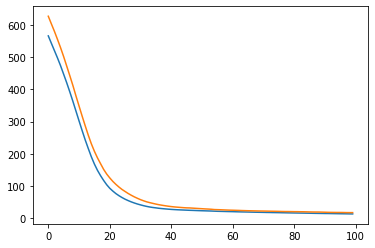

In [76]:
plt.plot(history.epoch, history.history['loss'])
plt.plot(history.epoch, history.history['val_loss'])

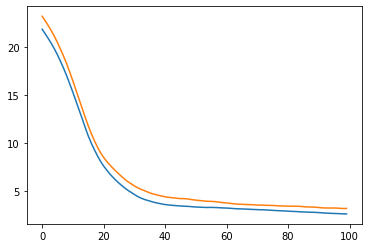

In [77]:
plt.plot(history.epoch, history.history['mae'])
plt.plot(history.epoch, history.history['val_mae'])

In [78]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 21.2510 - mae: 3.4532


[21.250991821289062, 3.453181266784668]

In [79]:
model.save('models/boston.hdf5')

In [80]:
from tensorflow.keras.models import load_model

In [81]:
old_model = load_model('models/boston.hdf5')

In [82]:
# x_new =...
# old_model.predict()

In [51]:
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt

In [52]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [53]:
X_train.shape

(60000, 28, 28)

In [54]:
X_test.shape

(10000, 28, 28)

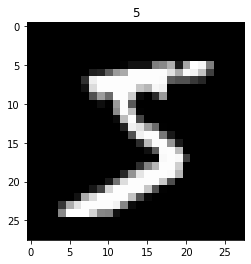

In [55]:
plt.title(y_train[0])
plt.imshow(X_train[0], cmap='gray')

In [56]:
img_size = X_train.shape[1]
X_train = X_train.reshape(X_train.shape[0], img_size * img_size)
X_train.shape

(60000, 784)

In [57]:
X_test = X_test.reshape(X_test.shape[0], img_size * img_size)
X_test.shape

(10000, 784)

In [58]:
y_train[0]

5

In [59]:
# 0 - 1 0 0 0 0 0 0 0 0 0
# 3 - 0 0 0 1 0 0 0 0 0 0

In [60]:
from tensorflow.keras.utils import to_categorical

In [61]:
y_train = to_categorical(y_train, 10)

In [62]:
y_train.shape

(60000, 10)

In [63]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [64]:
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [65]:
# (0,255) -> (0,1)
# X_train.astype('float')
X_train = X_train / 255

In [66]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [67]:
X_train[0].dtype

dtype('float64')

In [68]:
X_train.shape

(60000, 784)

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [70]:
model = Sequential()
model.add(Dense(input_dim=X_train.shape[1], units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [71]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

In [72]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [73]:
history = model.fit(X_train, y_train, batch_size=128, epochs=10)

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.3260 - accuracy: 0.9084
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1368 - accuracy: 0.9600
Epoch 3/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0962 - accuracy: 0.9713
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0725 - accuracy: 0.9780
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0579 - accuracy: 0.9827
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0481 - accuracy: 0.9850
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0365 - accuracy: 0.9886
Epoch 8/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0321 - accuracy: 0.9902
Epoch 9/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0250 - accuracy: 0.9922
Epoch 10/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0231 - accuracy: 0.9926

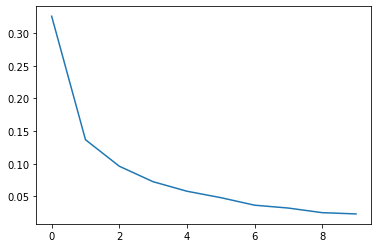

In [74]:
plt.plot(history.epoch, history.history['loss'])

In [75]:
X_test  = X_test / 255

In [76]:
y_test = to_categorical(y_test, 10)

In [77]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0824 - accuracy: 0.9755


[0.08242037892341614, 0.9754999876022339]

In [78]:
y_pred = model.predict(X_test)

In [79]:
y_pred.shape

(10000, 10)

In [80]:
y_pred[0]

array([8.5784153e-09, 6.5556440e-09, 5.2192183e-07, 7.5192056e-06,
       1.9740855e-11, 6.3063292e-09, 1.7041071e-14, 9.9998653e-01,
       9.6389066e-08, 5.3808212e-06], dtype=float32)

In [81]:
y_pred[1]

array([2.5979746e-08, 6.5945216e-08, 9.9991751e-01, 7.3376803e-05,
       3.5569007e-12, 1.9447134e-08, 8.9302532e-08, 1.0925839e-13,
       8.9596333e-06, 9.9484684e-14], dtype=float32)

In [82]:
import numpy as np
np.argmax(y_pred[0])

7

In [83]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [84]:
np.argmax(y_test)

7

In [85]:
errors = []
for i in range(X_test.shape[0]):
    pred_class = np.argmax(y_pred[i])
    true_class = np.argmax(y_test[i])
    if pred_class != true_class:
        errors.append(i)

In [86]:
len(errors)

245

In [87]:
import random

4 9


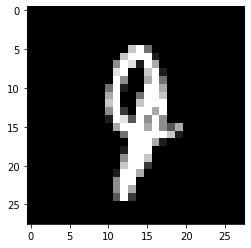

In [94]:
random_index = random.choice(errors)
pred_label = np.argmax(y_pred[random_index])
true_label = np.argmax(y_test[random_index])
print(pred_label, true_label)
plt.imshow(X_test[random_index].reshape(img_size, img_size), cmap='gray')